### NAME - AAKANKSHA BHAGURE
### Roll no -21102A0050
### Git hub link -  https://github.com/aakanksha0250/Titanic-Survival-Prediction-using-Logistic-Regression.git

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load the data 

In [2]:
df = pd.read_csv('Titanictrain.csv')
df.head()

df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Preprocessing

In [3]:
# Drop the 'Cabin' column due to many missing values
df = df.drop(columns='Cabin')

In [4]:
# Fill missing 'Age' values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
# Convert categorical variables to numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [7]:
# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [8]:
# Separate features and target variable
X = df.drop(columns='Survived')
y = df['Survived']

In [9]:
# Ensure all features are of type int or float
X = X.astype(float)

### Split the Data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Build and train the logistic regression model

In [11]:
model = LogisticRegression(max_iter=200, solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

 ### Evaluate the Model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [14]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[91  9]
 [30 49]]


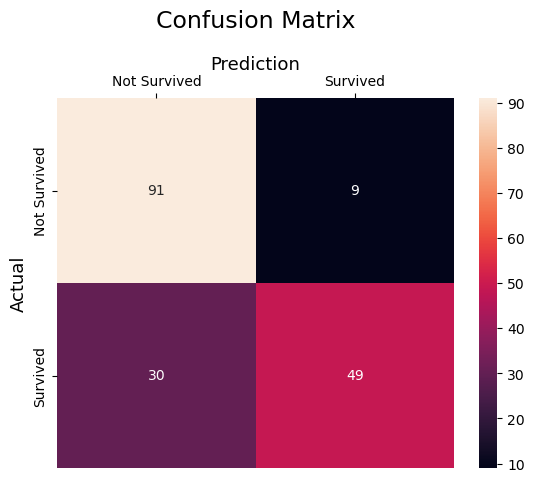

In [15]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.show()

In [16]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [17]:
# Analyze the model coefficients to identify influential features
coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

In [18]:
# Display sorted feature importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

      Feature  Coefficient
5  Sex_female     1.371755
8  Embarked_Q     0.110011
7  Embarked_C     0.087910
4        Fare     0.002664
3       Parch    -0.027132
1         Age    -0.044962
9  Embarked_S    -0.208374
2       SibSp    -0.419729
0      Pclass    -1.078146
6    Sex_male    -1.382207


##### Summary of Significant Features:
###### Most Positive Impact: Sex_female has the highest positive coefficient, indicating a strong positive impact on survival.
###### Most Negative Impact: Sex_male has the highest negative coefficient, indicating a strong negative impact on survival.
###### Other Notable Features: Pclass and SibSp also have significant negative impacts, while Fare has a slight positive impact.

##### Potential Improvements:
###### Feature Engineering: Include more relevant features or create new ones from existing data, such as family size or title from names.
###### Data Scaling: Normalize or standardize the features to improve model convergence and performance.
###### Cross-Validation: Use cross-validation to ensure the model's robustness and avoid overfitting.
###### Handle Class Imbalance: Use techniques like SMOTE or class weighting to address any imbalance between classes.